# Specific Ion Effects in Electrolytes #

## Introduction ##

Electrolytes are fundamentally important to colloid & interface science, and chemistry more broadly. The encompass acids, bases and salts, and are key components in batteries, fertilisers and cleaning agents. Even life itself requires electrolytes - you have often heard that life is based on water... it would be more accurate to say that life is based on _salty_ water - with the average ionic strength of the cytoplasm and plasma being ~ 0.15M.

<div style="display:flex">
    <div style="width:75%;margin-right:40px;">
        In practically all of these contexts, the effect of the electrolyte is dependent not only on the ions' charges or concentrations, as suggested by widely-used theories (e.g. Debye-H&uuml;ckel theory), but also on their <i>identity</i>. For example, KF has accute toxicity in humans, while KI is used to treat hypothyroidism - clearly the <i>identity</i> of the anion here matters! Such phenomena, in which the ions' identities effect the physical properties and behaviour of a chemical system are collectively known as *specific ion effects*. Throughout colloid and interface science, specific ion effects are the rule, rather than the exception.
        <br> <br>The first recorded  example of a specific ion effect is the well-known <b>Hofmeister Effect</b>, discovered by Franz Hofmeister (right) in 1888. Hofmeister noticed that salts' abilities to precipitate proteins from aqueous hen egg white solutions followed a specific order, which today we understand to be:
    </div>
    <div style="width:25%">
        <img src="https://cen.acs.org/content/dam/cen/85/48/8548sci1_hofmeistercxd.gif" style="float:right;maxwidth:100%;maxheight:100%">
    </div>
<div>

$$\require{mhchem}$$
**Anions**:  $\ce{C4H4O6^{2-}}$ (tartrate) > $\ce{F-}$ $\approx$ $\ce{SO4^{2-}}$ > $\ce{HPO4^{2-}}$ > $\ce{H3CCOO-}$ (acetate) > $\ce{HCO3-}$ $\ce{Cl-}$ > $\ce{Br-}$ > $\ce{NO3-}$ > $\ce{ClO3-}$ > $\ce{I-}$ > $\ce{SCN-}$

**Cations**: $\ce{Li+}$ > $\ce{K+}$ $\approx$ $\ce{Na+}$ > $\ce{NH4+}$ > $\ce{Mg2+}$

<div style="display:flex">
    <div style="width:75%;margin-right:40px;">
        Here, ">" indicates a stronger ability to precipitate the protein, or "salt-out" the protein, meaning that less of that salt is needed for the protein to precipitate.
        <br> <br> Today, the Hofmeister Series is (quite literally) set in stone - the plaque on the right is still at Charles University in Prague, where Hofmeister performed these experiments. However, there are almost as many examples of specific ion effects that contradict this ordering, as examples that follow it! Understanding why this happens is still a very active field of research in chemistry, biology and physics. 
        <br> <br>
        One theory often cited to explain why some salts "salt-out" macromolecules from solution (i.e. destabilise them, inducing their precipitation), while others "salt-in" macromolecules (i.e. stabilise them, preventing their precipitation) is based on the ions' tendency to interact with the surrounding water structure. Consider the figure on the right, which shows K<sup>+</sup> (blue) and Na<sup>+</sup> (green) cations interacting with RNaseA in water. You can see that Na<sup>+</sup> shows a preference to interact with the macromolecule, rather than the surrounding water environment. On the other hand, K<sup>+</sup> shows the opposite preference - it prefers to interact with the solvent. In other words, we would say that Na<sup>+</sup> has a <b>"weaker solvation structure"</b> in water, compared to K which has a <b>"stronger solvation structure"</b>. This causes Na<sup>+</sup> to stabilise the RNaseA structure, keeping it dissolved, while K<sup>+</sup>, which solvates in water more strongly, causes the RNaseA to precipitate from solution.
    </div>
    <div style="width:25%">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Prag_Medizinische_Fakultät_Franz_Hofmeister_448.jpg/1024px-Prag_Medizinische_Fakultät_Franz_Hofmeister_448.jpg" align="center" style="float:right;maxwidth:100%;maxheight:50%" />
        <br> <br>
        <img src="http://cen.acs.org/content/dam/cen/85/48/8548sci1_proteincxd1.gif" align="center" style="float:right;maxwidth:100%;maxheight:50%" />
    </div>
</div>

It is clear from this example that **ion solvation in water is an example of a specific-ion effect**. This workshop will investigate this ion-specific solvation of ions using molecular dynamics simulations.

### Workshop Aims ###

In this workshop, we will use molecular dynamics simulations to investigate specific ion effects regarding the structure of aqueous electrolytes. 

The aims of this workshop are to - 

1. Perform NPT-MD simulations of aqueous NaF, NaCl and NaI solutions
1. Investigate the solvation structure of dissolved cations and anions in these solutions using radial distribution functions
1. Investigate the coordination structure of dissolved cations and anions in these solutions via coordination numbers. 
1. Elucidate specific-ion effects in these solvation and coordination structures in aqueous electrolytes. 

## Simulating Electrolytes ##

### Aqueous NaCl ###

#### Setting Things Up ####

First things first - as we saw in Workshop 1, several modules need to be first loaded into our Jupyter notebook so that we can run our MD simulation. Let's take care of this now:from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
import re
import time
import numpy as np

In [87]:
from openmm.app import *
from openmm import *
from openmm.unit import *
from sys import stdout
import re
import time
import numpy as np

Now let's define the physical parameters of our simulation. You can use the panels below to change them, however for now it is ok to leave them at their present values. 

In [88]:
import ipywidgets as widgets 
from IPython.display import display

#SIMULATION TEMPERATURE
# create a float text widget to input variable
temp_text = widgets.FloatText(
    value=298.0,  # default value 
    description='Simulation Temperature (K):',
    step=1.0,  # step size
)
# adjust the layout of the widget
temp_text.layout.width = 'auto'
temp_text.style.description_width = 'initial'
# define a function to update the variable
def update_temp_text(change):
    global simTemperature
    simTemperature = change.new
# register the update function with the widget
temp_text.observe(update_temp_text, 'value')
# display the widget
display(temp_text)
# access the selected temperature value
simTemperature = temp_text.value*kelvin

#BOXSIZE
# create a float text widget to input variable
temp_text = widgets.FloatText(
    value=35.0,  # default value 
    description='Box Size (Angstrom):',
    step=1.0,  # step size 
)
# adjust the layout of the widget
temp_text.layout.width = 'auto'
temp_text.style.description_width = 'initial'
# define a function to update the variable
def update_temp_text(change):
    global boxsize
    boxsize = change.new
# register the update function with the widget
temp_text.observe(update_temp_text, 'value')
# display the widget
display(temp_text)
# access the selected temperature value
boxsize = temp_text.value

#TIMESTEP
# create a float text widget to input variable
temp_text = widgets.FloatText(
    value=1.0,  # default value 
    description='Time step (fs):',
    step=0.5,  # step size 
)
# adjust the layout of the widget
temp_text.layout.width = 'auto'
temp_text.style.description_width = 'initial'
# define a function to update the variable
def update_temp_text(change):
    global simTimestep
    simTimestep = change.new
# register the update function with the widget
temp_text.observe(update_temp_text, 'value')
# display the widget
display(temp_text)
# access the selected temperature value
simTimestep = temp_text.value*femtoseconds

#PRESSURE
# create a float text widget to input variable
temp_text = widgets.FloatText(
    value=1.0,  # default value 
    description='Simulation pressure (atm):',
    step=0.10,  # step size 
)
# adjust the layout of the widget
temp_text.layout.width = 'auto'
temp_text.style.description_width = 'initial'
# define a function to update the variable
def update_temp_text(change):
    global simPressure
    simPressure = change.new
# register the update function with the widget
temp_text.observe(update_temp_text, 'value')
# display the widget
display(temp_text)
# access the selected temperature value
simPressure = temp_text.value*atmospheres

#STEPS
# create a float text widget to input variable
temp_text = widgets.FloatText(
    value=10000,  # default value 
    description='# MD steps:',
    step=100,  # step size 
)
# adjust the layout of the widget
temp_text.layout.width = 'auto'
temp_text.style.description_width = 'initial'
# define a function to update the variable
def update_temp_text(change):
    global simNumSteps
    simNumSteps = change.new
# register the update function with the widget
temp_text.observe(update_temp_text, 'value')
# display the widget
display(temp_text)
# access the selected temperature value
simNumSteps = temp_text.value

#SODIUM
# create a float text widget to input variable
temp_text = widgets.FloatText(
    value=1,  # default value 
    description='# Cations:',
    step=1,  # step size 
)
# adjust the layout of the widget
temp_text.layout.width = 'auto'
temp_text.style.description_width = 'initial'
# define a function to update the variable
def update_temp_text(change):
    global cation
    cation = change.new
# register the update function with the widget
temp_text.observe(update_temp_text, 'value')
# display the widget
display(temp_text)
# access the selected temperature value
cation = temp_text.value

#ANION
# create a float text widget to input variable
temp_text = widgets.FloatText(
    value=1,  # default value 
    description='# Anions:',
    step=1,  # step size 
)
# adjust the layout of the widget
temp_text.layout.width = 'auto'
temp_text.style.description_width = 'initial'
# define a function to update the variable
def update_temp_text(change):
    global anion
    anion = change.new
# register the update function with the widget
temp_text.observe(update_temp_text, 'value')
# display the widget
display(temp_text)
# access the selected temperature value
anion = temp_text.value



FloatText(value=298.0, description='Simulation Temperature (K):', layout=Layout(width='auto'), step=1.0, style…

FloatText(value=35.0, description='Box Size (Angstrom):', layout=Layout(width='auto'), step=1.0, style=Descrip…

FloatText(value=1.0, description='Time step (fs):', layout=Layout(width='auto'), step=0.5, style=DescriptionSt…

FloatText(value=1.0, description='Simulation pressure (atm):', layout=Layout(width='auto'), step=0.1, style=De…

FloatText(value=10000.0, description='# MD steps:', layout=Layout(width='auto'), step=100.0, style=Description…

FloatText(value=1.0, description='# Cations:', layout=Layout(width='auto'), step=1.0, style=DescriptionStyle(d…

FloatText(value=1.0, description='# Anions:', layout=Layout(width='auto'), step=1.0, style=DescriptionStyle(de…

The parameters above do not specify the the # of waters we will place in our simulation box. But knowing the size of the box, and the density of water (0.9987 g/cm$^3$ at STP) we can work out how many waters we need, and the resulting solution concentration:

In [89]:
density=0.99705
water=int(boxsize**3*density*1e6*(1e-10)**3/(18.01)*6.02214e23)
concentration_molpercent=cation/water*100
concentration_molar=cation*density*1e3/(water*18.01)
print("Box size of",boxsize,"angstroms at density,",density,"g/cm3 requires ",water," water molecules")
print("concentration (mol%)=",concentration_molpercent)
print("concentration (M)=",concentration_molar)

Box size of 35.0 angstroms at density, 0.99705 g/cm3 requires  1429  water molecules
concentration (mol%)= 0.06997900629811056
concentration (M)= 0.03874101511911779


Once you're happy with your simulation parameters, let's make sure their stored correctly by executing the next cell:

In [90]:
print(f"Simulation size: {water} waters")
print(f"Box size: {boxsize} Ang.")
print(f"Simulation temperature: {simTemperature}")
print(f"Simulation pressure: {simPressure}")
print(f"Simulation time step: {simTimestep}")
print(f"# MD steps: {simNumSteps} ; Total simulation length: {simNumSteps * simTimestep} = {simNumSteps*simTimestep / 1000 / 1000 / femtoseconds * nanoseconds}.")
pdbFile = 'nacl_system.pdb'

Simulation size: 1429 waters
Box size: 35.0 Ang.
Simulation temperature: 298.0 K
Simulation pressure: 1.0 atm
Simulation time step: 1.0 fs
# MD steps: 10000.0 ; Total simulation length: 10000.0 fs = 0.01 ns.


#### Generating the Unit Cell ####

With the parameters for our simulation now defined, we can generate our simulation box. As we have seen in Workshop 1, we will use ```packmol``` to do this.

To start with, we will prepare the input file, ```packmol.in```, that ```packmol``` will go looking for. This input file tells ```packmol``` to build a box of waters according to the parameters that you just set above:

In [91]:
with open("packmol.in", "w") as f:
    f.write("tolerance 2.0\n")
    f.write("filetype pdb\n")
    f.write("output nacl_system.pdb\n") ### CHANGE THIS LINE FOR NaF, NaI 
    f.write("\n")
    f.write("structure water.pdb\n")
    f.write("  number {0}\n".format(water))
    f.write("  inside cube 2. 2. 2. {0}\n".format(boxsize))
    f.write("end structure\n")
    f.write("structure na+.pdb\n")
    f.write("  number {0}\n".format(int(cation)))
    f.write("  inside cube 2. 2. 2. {0}\n".format(boxsize))
    f.write("end structure\n")
    f.write("structure cl-.pdb\n")  ### CHANGE THIS LINE FOR NaF, NaI 
    f.write("  number {0}\n".format(int(anion)))
    f.write("  inside cube 2. 2. 2. {0}\n".format(boxsize))
    f.write("end structure\n")
    f.write("\n")
    f.write("add_box_sides 1.0\n")

Now we run ```packmol``` itself, and make sure that everything worked ok:

In [92]:
#%%bash
!packmol < packmol.in > packmol.out

In [93]:
with open('packmol.out', 'r') as f:
    text = f.read()
    print(text)


################################################################################

 PACKMOL - Packing optimization for the automated generation of
 starting configurations for molecular dynamics simulations.
 
                                                              Version 20.14.0 

################################################################################

  Packmol must be run with: packmol < inputfile.inp 

  Userguide at: http://m3g.iqm.unicamp.br/packmol 

  Reading input file... (Control-C aborts)
  Will print BOX SIDE informations. 
  Will sum    1.0000000000000000       to each side length on print
  Seed for random number generator:      1234567
  Output file: nacl_system.pdb
  Reading coordinate file: water.pdb
  Reading coordinate file: na+.pdb
  Reading coordinate file: cl-.pdb
  Number of independent structures:            3
  The structures are: 
  Structure            1 :water.pdb(           3  atoms)
  Structure            2 :na+.pdb(           1  atoms)
  S

Let's take a look at the simulation box that you've just generated: 

In [94]:
with open('nacl_system.pdb', 'r') as f:
    text = f.read()
    print(text)

HEADER 
TITLE     Built with Packmol                                             
REMARK   Packmol generated pdb file 
REMARK   Home-Page: http://m3g.iqm.unicamp.br/packmol
REMARK
CRYST1    36.10    36.09    36.01  90.00  90.00  90.00 P 1           1
ATOM      1  O   HOH A   1       4.124  34.881  26.039  1.00  0.00           O  
ATOM      2  H1  HOH A   1       3.341  34.392  25.789  1.00  0.00           H  
ATOM      3  H2  HOH A   1       4.851  34.366  25.689  1.00  0.00           H  
ATOM      4  O   HOH A   2      16.553  30.844  30.894  1.00  0.00           O  
ATOM      5  H1  HOH A   2      17.059  30.428  31.591  1.00  0.00           H  
ATOM      6  H2  HOH A   2      16.352  31.717  31.231  1.00  0.00           H  
ATOM      7  O   HOH A   3       4.099  25.337  11.787  1.00  0.00           O  
ATOM      8  H1  HOH A   3       3.892  25.832  12.579  1.00  0.00           H  
ATOM      9  H2  HOH A   3       4.987  25.010  11.932  1.00  0.00           H  
ATOM     10  O   HOH

For this workshop, we will only be using the TIP3P water model for these simulations, so we do not need to define dummy atoms etc., as we had to for the TIP4P water model simulations in Workshop 1. Finally, we will define the ```pdb``` using the PDB file that we just generated using ```packmol```:

In [95]:
pdb = PDBFile('nacl_system.pdb')

We can move on and define our MD simulation now!

#### Defining the MD Simulation ####

We are now ready to setup the MD simulation objects using the ```OpenMM``` python module. The process for this is _exactly_ the same as that in Workshop 1 - we need to define: 

1. What forcefield we are going to use (this defines how bonded and non-bonded atoms interact with each other)
1. What the system topology is (i.e. which atoms are connected to which atoms etc.)
1. How we will control the simulation temperature and pressure (e.g. using a _thermostat_ or a _barostat_), and
1. How we will iterate Newton's equations of motion (i.e. the _integrator_)

Run the cells below. They will setup the simulation in the following way: 

1. We will apply the TIP3P water model forcefield and store it in  the ```tip3p_forcefield``` object. 
1. We combine the ```tip3p_forcefield``` object with the topology in our PDB file ```system.pdb``` (generated above using packmol) to define the MD simulation, which we store in the ```tip3p_system``` object. 
1. We add a barostat (the ```MonteCarloBarostat```) to the simulation using ```OpenMM```'s ```addForce``` module. 
1. We use ```OpenMM```'s ```NoseHooverIntegrator``` to iterate the equations of motion.


In [96]:
forcefield = ForceField('amber14-all.xml', 'amber14/tip3p.xml')

In [97]:
system = forcefield.createSystem(pdb.topology,nonbondedMethod=PME,nonbondedCutoff=14*angstrom,constraints=None,rigidWater=False)

In [98]:
system.addForce(MonteCarloBarostat(simPressure, simTemperature, 1))

5

In [99]:
integrator = NoseHooverIntegrator(simTemperature,0.1/picosecond,simTimestep)

In [100]:
nacl = Simulation(pdb.topology,system,integrator)

In [101]:
nacl.context.setPositions(pdb.positions)

Note that we have defined the NaCl MD simulation here via the ```nacl``` object. Now we are ready to run!! 

#### Energy Minimisation ####

First things first - we have to minimise the energy of our ```nacl``` system to a local minimum on the potential energy surface. Run the next cell to do this: 

In [102]:
print("Running Energy Minimisation:")
t0 = time.time()
nacl.minimizeEnergy()
t1 = time.time()
minTime = t1-t0
print("Minimisation took {} seconds".format(minTime))

Running Energy Minimisation:
Minimisation took 4.566900014877319 seconds


#### Running the MD Simulation ####

The arrangement of waters and ions in your box should now correspond to a local energy minima, meaning that you are good to go - run the MD simulation!

Before you do though, we want to make sure that we store the relevant data from the MD trajectory. The cell below will take care of this for you, and will track the progress of the MD simulation in two files ```nacl.dcd```, and ```nacl.csv```:

In [103]:
nacl.reporters.append(DCDReporter('nacl.dcd', 10))
nacl.reporters.append(StateDataReporter(
    'nacl.csv', 
    10, 
    step=True,
    time=True,
    temperature=True, 
    potentialEnergy=True, 
    kineticEnergy=True,
    totalEnergy=True, 
    volume=True, 
    density=True
))

In [104]:
# Run the simulation:
print('Start Simulation')
t0 = time.time()
nacl.step(simNumSteps)
t1 = time.time()
simTime = t1-t0
print("Simulation took {} seconds for {} timesteps".format(simTime,simNumSteps)) 

Start Simulation
Simulation took 201.19522404670715 seconds for 10000.0 timesteps


### Exercise: Simulating Aqueous NaF ###

Copy, paste and edit the sample code above that generated the ```nacl``` simulation object to: 

1. Generate a new ```packmol.in``` to create a 35 Angstrom box of water with a NaF ion pair in it. Use the pdb files "na+.pdb" and "f-.pdb" when generating this ```packmol.in``` file. (See "**Generating the Unit Cell**").
1. Generate your  NaF aqueous solution box using ```packmol```. (See "**Generating the Unit Cell**").
1. Minimise the energy of this aqueous NaF solution to a local minimim on the potential energy surface using ```OpenMM```. (See "**Energy Minimisation**").
1. Create and run a 50 ps MD simulation of this aqueous NaF solution using the NPT ensemble using ```OpenMM``` (See "**Running the MD Simulation**"). 

##### Important Notes #####
1. Insert as many code cells in the jupyter notebook below as you need. Try and keep your code as 'clean' as possible - it will help you solve and debug problems if and when they happen!
1. If you get stuck, ask your demonstrator for help!
1. <span style="color:red;">REALLY IMPORTANT - make sure that you change all "nacl" to "naf" in your new code below. Otherwise you will destroy the NaCl simulation you just ran!</span>
1. <span style="color:red;">REALLY IMPORTANT - make sure that you change the "cl-.pdb" to "f-.pdb" when  you generate your ```packmol.in``` file - otherwise you will just be simulating aqueous NaCl again...</span>


### Exercise: Simulating Aqueous NaI ###

Copy, paste and edit the sample code above that generated the ```nacl``` simulation object to: 

1. Generate a new ```packmol.in``` to create a 35 Angstrom box of water with a NaI ion pair in it. Use the pdb files "na+.pdb" and "i-.pdb" when generating this ```packmol.in``` file. (See "**Generating the Unit Cell**").
1. Generate your  NaI aqueous solution box using ```packmol```. (See "**Generating the Unit Cell**").
1. Minimise the energy of this aqueous NaI solution to a local minimim on the potential energy surface using ```OpenMM```. (See "**Energy Minimisation**").
1. Create and run a 50 ps MD simulation of this aqueous NaI solution using the NPT ensemble using ```OpenMM``` (See "**Running the MD Simulation**"). 

##### Important Notes #####
1. Insert as many code cells in the jupyter notebook below as you need. Try and keep your code as 'clean' as possible - it will help you solve and debug problems if and when they happen!
1. If you get stuck, ask your demonstrator for help!
1. <span style="color:red;">REALLY IMPORTANT - make sure that you change all "nacl" to "nai" in your new code below. Otherwise you will destroy the NaCl simulation you just ran!</span>
1. <span style="color:red;">REALLY IMPORTANT - make sure that you change the "cl-.pdb" to "i-.pdb" when  you generate your ```packmol.in``` file - otherwise you will just be simulating aqueous NaCl again...</span>


### Analysis - Ion Solvation Structure ###

<div style="display:flex">
    <div style="width:70%;margin-right:40px;">
        In Workshop 1, we employed radial distribution functions to get a better understanding of the arrangement of individual molecules in bulk water, and therefore the hydrogen bonding structure of this liquid. Here, we will use radial distribution functions for a similar purpose - i.e. to understand how ions are solvated in bulk water (i.e. their "solvation structure"). The solvation structure of a Na<sup>+</sup> cation in water is shown schematically on the right - since this cation is positively charged, it interacts with surrounding water molecules predominantly via electrostatic interactions, which forces water to rearrange and coordinate the cation via the negative dipole on the oxygen atom. Conversely, Cl<sup>-</sup> anions predominantly interact via the positive dipoles on the hydrogen atoms. 
    </div>
    <div style="width:25%">
        <img src="http://www.grandinetti.org/resources/Teaching/Chem121/Lectures/SolutionChemistry/water3.gif" style="float:right;maxwidth:100%;maxheight:100%">
    </div>
<div>

We can investigate both of these interactions via the respective radial distribution functions - that is, 

1. The radial distribution function of O atoms around the Na$^+$ cation (i.e. $g_{\text{Na-O}}(r)$)
1. The radial distribution function of H atoms around the Cl$^-$ anion (i.e. $g_{\text{Cl-H}}(r)$)

And by comparing the $g_{\text{Na-O}}(r)$ radial distribution function in the three different electrolytes we're studying here, we can begin to understand how the anion influences the cation's behaviour in an ion-specific way. 

Let's start with the NaCl solution - the NaF and NaI solutions will be an exercise for you below. We'll take our NaCl MD trajectory and use the MDAnalysis python module to calculate the same RDFs as shown in the Figure above. 

In [105]:
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf

Similar to Workshop 1, the first step is to define the ```MDAnalysis``` "universe", using the NaCl MD trajectory we just created above. We can do this using the ```nacl.dcd``` trajectory file and ```nacl_system.pdb``` PDB files: 

In [106]:
nacl_universe = mda.Universe('nacl_system.pdb','nacl.dcd')

/Users/alisterpage/opt/anaconda3/envs/openMM/lib/python3.11/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


We now need to tell MDAnalysis which pairs of atoms we want to investigate via the ```select_atoms``` function. We'll store the list of oxygen atoms in the variable ```O```, and the list of sodium atoms in the variable ```Na```, chlorine in ```Cl``` and hydrogen in ```H```:

In [107]:
O = nacl_universe.select_atoms('name O')
H = nacl_universe.select_atoms('name H1 or name H2')
Na = nacl_universe.select_atoms('name NA')
Cl = nacl_universe.select_atoms('name Cl')

Notice here that the 'names' of the different elements are all a bit different - this is necessary since they must match the names of the elements in the ```nacl_system.pdb``` file. 

Now, we tell MDAnalysis the details of the RDFs that we are after: 

In [108]:
NaCl_NaO_rdf = rdf.InterRDF(Na,O,nbins=100,range=(1.0,10))
ClH_rdf = rdf.InterRDF(Cl,H,nbins=100,range=(1.0,10))

In [109]:
NaCl_NaO_rdf.run()
ClH_rdf.run()

As in Workshop 1, this should only take a few seconds. When it is finished, we can plot the results and look at the RDF! We will use the ```matplotlib``` python module, as we have before, to do this. Note that the horizontal and vertical axis data we want to plot are actually now in the ```.bins``` and ```.rdf``` variables, respectively. So we will pass these two variables to the plot command below for both the $g_{\text{Na-O}}(r)$ and $g_{\text{Cl-H}}(r)$ radial distribution functions:

(0.0, 10.0)

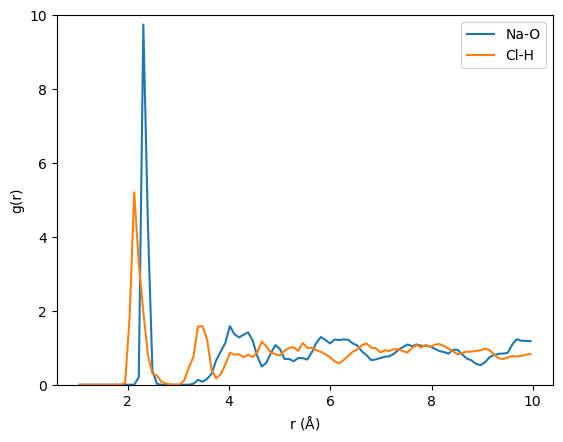

In [110]:
import matplotlib.pyplot as plt

plt.plot(NaCl_NaO_rdf.bins,NaCl_NaO_rdf.rdf,label="Na-O")
plt.plot(ClH_rdf.bins,ClH_rdf.rdf,label="Cl-H")
plt.xlabel("r ($\mathrm{\AA}$)")
plt.ylabel("g(r)")
plt.legend()
plt.ylim([0.0, 10])

#### Exercise - Ion Solvation in NaF and NaI ####

Using the sample code above that generated the $g_{\text{Na-O}}(r)$ and $g_{\text{Cl-H}}(r)$ radial distribution functions in aqueous NaCl, copy, paste and edit a new code to:

1. Calculate $g_{\text{Na-O}}(r)$ and $g_{\text{F-H}}(r)$ radial distribution functions in aqueous NaF.
1. Calculate $g_{\text{Na-O}}(r)$ and $g_{\text{I-H}}(r)$ radial distribution functions in aqueous NaI.
1. Create a single plot comparing the $g_{\text{Na-O}}(r)$ radial distribution functions in aqueous NaF, NaCl and NaI.
1. Create a single plot comparing the $g_{\text{Cl-H}}(r)$ radial distribution functions in aqueous NaF, NaCl and NaI.


##### Important Notes #####
1. Insert as many code cells in the jupyter notebook below as you need. Try and keep your code as 'clean' as possible - it will help you solve and debug problems if and when they happen!
1. If you get stuck, ask your demonstrator for help!
1. <span style="color:red;">REALLY IMPORTANT - make sure that you change all "nacl" to "naf" and/or "nai" in your new code below for NaF and NaI. Otherwise you will destroy the NaCl RDFs you just calculated!</span>

### Analysis - Ion Solvation Coordination ###

While radial distributions give us useful information regarding the length-scale of intermolecular interactions, it is important to realise that they don't quantify the _number_ of interactions. That is, the radial distribution function for atoms A and B does not answer the question "how many B atoms are bound to atom A?" 

The answer to this question is given via the **coordination number**. As we have seen in the lectures for this course, the coordination number is defined in terms of the radial distribution function itself, 

$$n_{AB}(r,\Delta r) = 4\pi\rho \int_{0}^{r'} r^{2} g_{AB} (r, \Delta r) dr$$

In effect, the coordination number is the sum of all B atoms found on a sphere centred on atom A of increasing radius $r$. This number, $n_{AB}$ is the answer to the previous question. 

Let's see how coordination numbers work in practice, using aqueous NaCl as our example. 

To start with, lets calculate the value of $\rho$ for our simulation.  $\rho$ is the particle density of the simulation - i.e. the number of particles per unit volume for our simulation box, $\frac{n}{V}$. Here, both $N$ and $V$ are already known - $N$ is just $3 \times N_{\text{water}}$ and V is the volume of the simulation box. We can calculate $n$ easily: 

In [111]:
N = water*3

The volume of the box is also easily recovered from the ```MDAnalysis``` universe for our aqueous NaCl simulation, which includes a ```dimensions``` variable: 

In [112]:
box=nacl_universe.dimensions
print(box)

[35.866188 35.85625  35.77677  90.       90.       90.      ]


The first 3 numbers here are the lengths of the sides of the box in angstrom, the last 3 numbers are the angles of between them (our box is a cube, so these are all 90 $^{\circ}$ in this case). The volume of the box is just the product of thee side lengths: 

In [113]:
volume = np.prod(box[0:2])
print("Box volume is ",volume,"angstrom^3")

Box volume is  1286.027 angstrom^3


So we can now calculate $\rho$: 

In [114]:
rho = N / volume
print("Particle density is",rho,"particles / Angstrom^3 ")

Particle density is 3.3335226047929343 particles / Angstrom^3 


The next step is to calculate the integral, i.e. $\int_{0}^{r'} r^{2} g_{AB} (r, \Delta r) dr$. To do this, we will use some useful functions in the Python ```numpy``` and ```itertools``` modules to save us some effort. Firstly, we will calculate $r^{2} g_{AB} (r, \Delta r)$ for each value of $r$ that we have used in the radial distribution function. To do this, we will use ```Numpy```'s ```multiply``` function:

In [115]:
NaCl_NaO_cdf=np.multiply(np.multiply(NaCl_NaO_rdf.bins,NaCl_NaO_rdf.bins),NaCl_NaO_rdf.rdf)/1000

where we have stored the result in ```NaCl_NaO_cdf``` (```cdf``` here is short for 'cumulative distribution function'). We can now calculate the coordination number for the Na-O radial distribution function:

In [116]:
from itertools import accumulate
NaCl_n_NaO=4*math.pi*rho*np.fromiter(accumulate(NaCl_NaO_cdf),dtype='float')

Here we have used the ```itertools``` ```accumulate``` function to add up the numbers inside the ```NaCl_NaO_cdf``` array, i.e. calculate the value of the integral $\int_{0}^{r'} r^{2} g_{AB} (r, \Delta r) dr$. 

What does this coordination number look like? Let's plot it and see:

(0.0, 20.0)

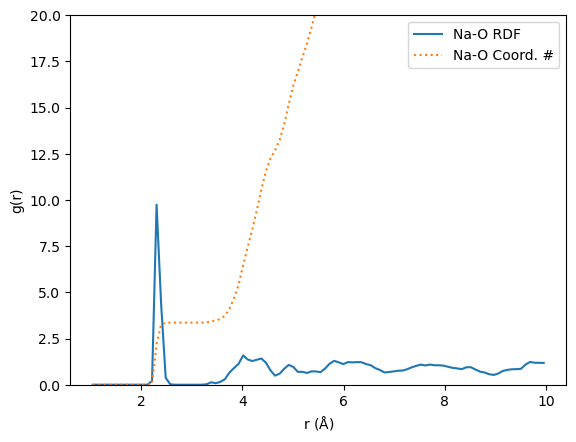

In [117]:
import matplotlib.pyplot as plt
plt.plot(NaCl_NaO_rdf.bins, NaCl_NaO_rdf.rdf,label="Na-O RDF")
plt.plot(NaCl_NaO_rdf.bins,NaCl_n_NaO,linestyle=":", label="Na-O Coord. #")
plt.xlabel("r ($\mathrm{\AA}$)")
plt.legend()
plt.ylabel("g(r)")
plt.ylim([0.0,20])

How do we interpret this coordination number? The principal Na-O interaction in aqueous NaCl solution corresponds to the sharp peak at ~2.5 Angstrom. Beyond this length scale, the Na-O radial distribution function quickly tends to the bulk limit value of 1.0. So, the value of the coordination number that corresponds to this initial principal peak tells us how many O atoms (i.e. water molecules) are coordinating the Na$^+$ cation in its first solvation shell. We can see that number is ~5.0. 

We can repeat this calculation for the $g_{\text{Cl-H}}(r)$ radial distribution function in aqueous NaCl to calculate # of H atoms coordinating the Cl$^-$ anion, simply by replacing the ```NaO_rdf``` variable with ```ClH_rdf```:

(0.0, 20.0)

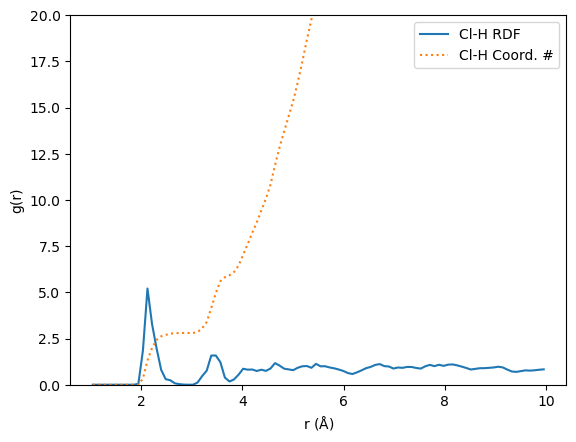

In [118]:
ClH_cdf=np.multiply(np.multiply(ClH_rdf.bins,ClH_rdf.bins),ClH_rdf.rdf)/1000
n_ClH=4*math.pi*rho*np.fromiter(accumulate(ClH_cdf),dtype='float')
plt.plot(ClH_rdf.bins, ClH_rdf.rdf,label="Cl-H RDF")
plt.plot(ClH_rdf.bins,n_ClH,linestyle=":", label="Cl-H Coord. #")
plt.xlabel("r ($\mathrm{\AA}$)")
plt.legend()
plt.ylabel("g(r)")
plt.ylim([0.0,20])

So - what this is showing us is that, even though there are equivalent ratios of cations and anions in this solution, the Na$^+$ cation is much more strongly coordinated by the water O atoms in its first solvation shell, compared to the coordination of Cl$^-$ anions by water H atoms.

#### Exercise - Ion Coordination in NaF and NaI ####

Using the sample code above that generated the $n_{\text{Na-O}}(r)$ and $g_{\text{Cl-H}}(r)$ coordination numbers in aqueous NaCl, copy, paste and edit a new code to:

1. Calculate $n_{\text{NaO}}(r)$ and $n_{\text{FH}}(r)$ coordination numbers in aqueous NaF.
1. Calculate $n_{\text{NaO}}(r)$ and $n_{\text{IH}}(r)$ coordination numbers in aqueous NaI.
1. Create a single plot comparing the $n_{\text{NaO}}(r)$ coordination numbers in aqueous NaF, NaCl and NaI.
1. Create a single plot comparing the $n_{\text{XH}}(r)$ coordination numbers (X = anion) in aqueous NaF, NaCl and NaI.


##### Important Notes #####
1. Insert as many code cells in the jupyter notebook below as you need. Try and keep your code as 'clean' as possible - it will help you solve and debug problems if and when they happen!
1. If you get stuck, ask your demonstrator for help!
1. <span style="color:red;">REALLY IMPORTANT - make sure that you change all "nacl" to "naf" and/or "nai" in your new code below for NaF and NaI. Otherwise you will destroy the NaCl coordination numbers you just calculated!</span>

## Discussion Questions and Information for Preparing Your Report ##

In your report, consider and discuss the following questions based on the data you have created above:

1. In the aqueous electrolytes NaF, NaCl, NaI, which species has the greater propensity to interact with the solvent, and why? Explain your answer. 
1. Are the ion solvation structures of these electrolytes ion-specific? Explain your answer. 
1. Of these cations and anions, which has the greatest impact on the structure of the surrounding water solvent? Do you expect this to be dependent on concentration? Explain your answer.
1. Are your results here, and your answers to the preceding questions, consistent with the order of the Hofmeister series for F$^-$, Cl$^-$ and I$^-$? 
1. Can you explain the trends you've observed in these simulations in terms of the fundamental intermolecular interactions present in these electrolytes (i.e. electrostatic, polarisation and dispersion interactions)? Explain your answer. 

_You may find the following references useful for preparing your report:_

1. Gregory, K. P.,  Elliott, G. R., Robertson, H., Kumar, A.,  Webber, G. B., Wanless, E. J.,  Andersson, G. G., Craig, V. S. J.,  Page, A. J. Understanding Specific Ion Effects and the Hofmeister Series. _Physical Chemistry Chemical Physics_, **24**, 12682-12718 (2022). DOI: 10.1039/D2CP00847E
1. Yagasaki, T., Matsumoto, M., Tanaka, H., Lennard-Jones Parameters Determined to Reproduce the Solubility of NaCl and KCl in SPC/E, TIP3P, and TIP4P/2005 Water. _Journal of Chemical Theory and Computation_, **16**, 2460 (2020). DOI: 10.1021/acs.jctc.9b00941
1. Chandra, Dynamical Behavior of Anion−Water and Water−Water Hydrogen Bonds in Aqueous Electrolyte Solutions:  A Molecular Dynamics Study. _Journal of Physical Chemistry B_, **107**, 3899 (2003). DOI: 10.1021/jp022147d